In [5]:
import pandas as pd

### Leitura do excel

In [6]:
# Esse comando abaixo já lê o excel removendo as duplicatas como o que pode ter sido rodado antes e a última
# iteração que roda mais de uma vez pelo programa que fica rerodando o STAR-CCM+
df_32 = pd.read_excel("WEGDOE32.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_33 = pd.read_excel("WEGDOE33.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_33

,Unnamed: 0,Time,Iteration,Continuity,X-momentum,Y-momentum,Z-momentum,Tke,Tdr,Anem?metro1(m/s),...,Maximum - anem?metro1 Z+1 j (m/s),Maximum - anem?metro1 Y-1 j (m/s),Maximum - anem?metro1 X-2 i (m/s),Maximum - anem?metro1 X+1 i (m/s),Maximum - anem?metro1 X+2 i (m/s),Maximum - anem?metro1 X-1 i (m/s),Maximum - anem?metro1 Y-1 i (m/s),Maximum - anem?metro1 Y-2 i (m/s),Maximum - anem?metro1 Y+1 i (m/s),Maximum - anem?metro1 Y+2 i (m/s)
0,1,"1,515152e-02",3,0.857638,0.875819,0.138951,0.186278,0.778331,7.491512e-01,9.988971,...,-0.001374,0.028596,9.908846,9.900842,9.904452,9.899926,9.731509,9.901910,9.895737,9.866188
1,2,"3,030303e-02",6,0.794830,0.664658,0.045855,0.061274,0.324010,2.415080e-01,9.955380,...,-0.000872,0.076941,9.930921,9.892173,9.912385,9.900662,9.466318,9.905794,9.874866,9.777399
2,3,"4,545454e-02",9,0.746697,0.623892,0.039221,0.055553,0.149025,6.506355e-02,9.900394,...,0.015825,0.113227,9.972460,9.871233,9.925536,9.914387,9.189245,9.922848,9.846408,9.656856
3,4,"6,060606e-02",12,0.697048,0.582674,0.033903,0.050667,0.091189,2.121976e-02,9.864493,...,0.032080,0.124153,10.016820,9.840126,9.941615,9.959150,8.936147,9.960497,9.826484,9.566764
4,5,"7,575758e-02",15,0.644668,0.538771,0.031580,0.046654,0.067664,1.208940e-02,9.877115,...,0.018067,0.113803,10.043740,9.809948,9.962737,10.031690,8.724938,10.013050,9.829025,9.537237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,5397,"8,177273e+01",16191,0.002904,0.003236,0.002769,0.001352,0.035693,2.446704e-08,9.281355,...,0.463991,0.537202,8.709159,8.533050,8.054338,9.451204,7.066474,8.725975,8.990564,7.808814
5397,5398,"8,178788e+01",16194,0.002899,0.003244,0.002782,0.001357,0.035693,2.429498e-08,9.359228,...,0.374375,0.356575,8.739593,8.618020,8.072013,9.502681,7.064930,8.790555,8.973735,7.771616
5398,5399,"8,180303e+01",16197,0.002884,0.003257,0.002783,0.001357,0.035693,2.414692e-08,9.438595,...,0.276020,0.176843,8.776778,8.710228,8.095246,9.552262,7.070559,8.859582,8.960844,7.751778
5399,5400,"8,181818e+01",16200,0.002853,0.003200,0.002775,0.001353,0.035693,2.387531e-08,9.515640,...,0.169369,-0.000124,8.819410,8.807716,8.127455,9.598192,7.086266,8.931305,8.952949,7.750702


### Funções que calculam a média da direção dos anemômetros

In [7]:
# Utilize essa função caso o excel tenha vindo com o ô igual a um ponto de interrogação.

import math

def calculate_average_direction_anemometers(row):
    direction_x_1 = math.atan(row[" Maximum - anem?metro1 X-1 j (m/s)"]/row[" Maximum - anem?metro1 X-1 i (m/s)"])
    direction_x_2 = math.atan(row[" Maximum - anem?metro1 X-2 j (m/s)"]/row[" Maximum - anem?metro1 X-2 i (m/s)"])
#     direction_y_1 = math.atan(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    direction_y_2 = math.atan(row[" Maximum - anem?metro1 Y-2 j (m/s)"]/row[" Maximum - anem?metro1 Y-2 i (m/s)"])
    direction_z_1 = math.atan(row[" Maximum - anem?metro1 Z-1 j (m/s)"]/row[" Maximum - anem?metro1 Z-1 i (m/s)"])
    direction_x1 = math.atan(row[" Maximum - anem?metro1 X+1 j (m/s)"]/row[" Maximum - anem?metro1 X+1 i (m/s)"])
    direction_x2 = math.atan(row[" Maximum - anem?metro1 X+2 j (m/s)"]/row[" Maximum - anem?metro1 X+2 i (m/s)"])
    direction_y1 = math.atan(row[" Maximum - anem?metro1 Y+1 j (m/s)"]/row[" Maximum - anem?metro1 Y+1 i (m/s)"])
    direction_y2 = math.atan(row[" Maximum - anem?metro1 Y+2 j (m/s)"]/row[" Maximum - anem?metro1 Y+2 i (m/s)"])
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    direction = math.atan(row[" Anem?metro1 j (m/s)"]/row[" Anem?metro1 i (m/s)"])
    return math.degrees(((direction_x_1+direction_x_2+direction_y_2+direction_z_1+direction_x1+direction_x2+direction_y1+
           direction_y2+direction)/9))

In [8]:
# Utilize essa função caso o excel tenha vindo com o ô normal.

import math

def calculate_average_direction_anemometers_complete_name(row):
    direction_x_1 = math.atan(row[" Maximum - anemômetro1 X-1 j (m/s)"]/row[" Maximum - anemômetro1 X-1 i (m/s)"])
    direction_x_2 = math.atan(row[" Maximum - anemômetro1 X-2 j (m/s)"]/row[" Maximum - anemômetro1 X-2 i (m/s)"])
#     direction_y_1 = math.atan(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    direction_y_2 = math.atan(row[" Maximum - anemômetro1 Y-2 j (m/s)"]/row[" Maximum - anemômetro1 Y-2 i (m/s)"])
    direction_z_1 = math.atan(row[" Maximum - anemômetro1 Z-1 j (m/s)"]/row[" Maximum - anemômetro1 Z-1 i (m/s)"])
    direction_x1 = math.atan(row[" Maximum - anemômetro1 X+1 j (m/s)"]/row[" Maximum - anemômetro1 X+1 i (m/s)"])
    direction_x2 = math.atan(row[" Maximum - anemômetro1 X+2 j (m/s)"]/row[" Maximum - anemômetro1 X+2 i (m/s)"])
    direction_y1 = math.atan(row[" Maximum - anemômetro1 Y+1 j (m/s)"]/row[" Maximum - anemômetro1 Y+1 i (m/s)"])
    direction_y2 = math.atan(row[" Maximum - anemômetro1 Y+2 j (m/s)"]/row[" Maximum - anemômetro1 Y+2 i (m/s)"])
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    direction = math.atan(row[" Anemômetro1 j (m/s)"]/row[" Anemômetro1 i (m/s)"])
    return math.degrees(((direction_x_1+direction_x_2+direction_y_2+direction_z_1+direction_x1+direction_x2+direction_y1+
           direction_y2+direction)/9))

### Funções que calculam a média da velocidade dos anemômetros

In [9]:
# Utilize essa função caso o excel tenha vindo com o ô igual a um ponto de interrogação.

import math

def calculate_average_velocity_anemometers(row):
    velocity_x_1 = math.sqrt((row[" Maximum - anem?metro1 X-1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X-1 i (m/s)"]**2))
    velocity_x_2 = math.sqrt((row[" Maximum - anem?metro1 X-2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X-2 i (m/s)"]**2))
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = math.sqrt((row[" Maximum - anem?metro1 Y-2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Y-2 i (m/s)"]**2))
    velocity_z_1 = math.sqrt((row[" Maximum - anem?metro1 Z-1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Z-1 i (m/s)"]**2))
    velocity_x1 = math.sqrt((row[" Maximum - anem?metro1 X+1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X+1 i (m/s)"]**2))
    velocity_x2 = math.sqrt((row[" Maximum - anem?metro1 X+2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X+2 i (m/s)"]**2))
    velocity_y1 = math.sqrt((row[" Maximum - anem?metro1 Y+1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Y+1 i (m/s)"]**2))
    velocity_y2 = math.sqrt((row[" Maximum - anem?metro1 Y+2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Y+2 i (m/s)"]**2))
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = math.sqrt((row[" Anem?metro1 j (m/s)"]**2)+(row[" Anem?metro1 i (m/s)"]**2))
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

In [10]:
# Utilize essa função caso o excel tenha vindo com o ô normal.

import math

def calculate_average_velocity_anemometers_complete_name(row):
    velocity_x_1 = math.sqrt((row[" Maximum - anemômetro1 X-1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X-1 i (m/s)"]**2))
    velocity_x_2 = math.sqrt((row[" Maximum - anemômetro1 X-2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X-2 i (m/s)"]**2))
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = math.sqrt((row[" Maximum - anemômetro1 Y-2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Y-2 i (m/s)"]**2))
    velocity_z_1 = math.sqrt((row[" Maximum - anemômetro1 Z-1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Z-1 i (m/s)"]**2))
    velocity_x1 = math.sqrt((row[" Maximum - anemômetro1 X+1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X+1 i (m/s)"]**2))
    velocity_x2 = math.sqrt((row[" Maximum - anemômetro1 X+2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X+2 i (m/s)"]**2))
    velocity_y1 = math.sqrt((row[" Maximum - anemômetro1 Y+1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Y+1 i (m/s)"]**2))
    velocity_y2 = math.sqrt((row[" Maximum - anemômetro1 Y+2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Y+2 i (m/s)"]**2))
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = math.sqrt((row[" Anemômetro1 j (m/s)"]**2)+(row[" Anemômetro1 i (m/s)"]**2))
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

### Funções que calculam a média das velocidades em i e j

In [11]:
import math

def calculate_velocity_i_anemometers(row):
    velocity_x_1 = row[" Maximum - anem?metro1 X-1 i (m/s)"]
    velocity_x_2 = row[" Maximum - anem?metro1 X-2 i (m/s)"]
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = row[" Maximum - anem?metro1 Y-2 i (m/s)"]
    velocity_z_1 = row[" Maximum - anem?metro1 Z-1 i (m/s)"]
    velocity_x1 = row[" Maximum - anem?metro1 X+1 i (m/s)"]
    velocity_x2 = row[" Maximum - anem?metro1 X+2 i (m/s)"]
    velocity_y1 = row[" Maximum - anem?metro1 Y+1 i (m/s)"]
    velocity_y2 = row[" Maximum - anem?metro1 Y+2 i (m/s)"]
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = row[" Anem?metro1 i (m/s)"]
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

In [12]:
import math

def calculate_velocity_j_anemometers(row):
    velocity_x_1 = row[" Maximum - anem?metro1 X-1 j (m/s)"]
    velocity_x_2 = row[" Maximum - anem?metro1 X-2 j (m/s)"]
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = row[" Maximum - anem?metro1 Y-2 j (m/s)"]
    velocity_z_1 = row[" Maximum - anem?metro1 Z-1 j (m/s)"]
    velocity_x1 = row[" Maximum - anem?metro1 X+1 j (m/s)"]
    velocity_x2 = row[" Maximum - anem?metro1 X+2 j (m/s)"]
    velocity_y1 = row[" Maximum - anem?metro1 Y+1 j (m/s)"]
    velocity_y2 = row[" Maximum - anem?metro1 Y+2 j (m/s)"]
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = row[" Anem?metro1 j (m/s)"]
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

### Calculando a direção média para os WEGDOE 32 e 33

In [13]:
# O resultado fica na última coluna
df_32["Direção média"] = df_32.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_33["Direção média"] = df_33.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_33

,Unnamed: 0,Time,Iteration,Continuity,X-momentum,Y-momentum,Z-momentum,Tke,Tdr,Anem?metro1(m/s),...,Maximum - anem?metro1 Y-1 j (m/s),Maximum - anem?metro1 X-2 i (m/s),Maximum - anem?metro1 X+1 i (m/s),Maximum - anem?metro1 X+2 i (m/s),Maximum - anem?metro1 X-1 i (m/s),Maximum - anem?metro1 Y-1 i (m/s),Maximum - anem?metro1 Y-2 i (m/s),Maximum - anem?metro1 Y+1 i (m/s),Maximum - anem?metro1 Y+2 i (m/s),Direção média
0,1,"1,515152e-02",3,0.857638,0.875819,0.138951,0.186278,0.778331,7.491512e-01,9.988971,...,0.028596,9.908846,9.900842,9.904452,9.899926,9.731509,9.901910,9.895737,9.866188,0.007400
1,2,"3,030303e-02",6,0.794830,0.664658,0.045855,0.061274,0.324010,2.415080e-01,9.955380,...,0.076941,9.930921,9.892173,9.912385,9.900662,9.466318,9.905794,9.874866,9.777399,0.016113
2,3,"4,545454e-02",9,0.746697,0.623892,0.039221,0.055553,0.149025,6.506355e-02,9.900394,...,0.113227,9.972460,9.871233,9.925536,9.914387,9.189245,9.922848,9.846408,9.656856,0.026476
3,4,"6,060606e-02",12,0.697048,0.582674,0.033903,0.050667,0.091189,2.121976e-02,9.864493,...,0.124153,10.016820,9.840126,9.941615,9.959150,8.936147,9.960497,9.826484,9.566764,0.051944
4,5,"7,575758e-02",15,0.644668,0.538771,0.031580,0.046654,0.067664,1.208940e-02,9.877115,...,0.113803,10.043740,9.809948,9.962737,10.031690,8.724938,10.013050,9.829025,9.537237,0.083688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,5397,"8,177273e+01",16191,0.002904,0.003236,0.002769,0.001352,0.035693,2.446704e-08,9.281355,...,0.537202,8.709159,8.533050,8.054338,9.451204,7.066474,8.725975,8.990564,7.808814,1.978974
5397,5398,"8,178788e+01",16194,0.002899,0.003244,0.002782,0.001357,0.035693,2.429498e-08,9.359228,...,0.356575,8.739593,8.618020,8.072013,9.502681,7.064930,8.790555,8.973735,7.771616,0.809310
5398,5399,"8,180303e+01",16197,0.002884,0.003257,0.002783,0.001357,0.035693,2.414692e-08,9.438595,...,0.176843,8.776778,8.710228,8.095246,9.552262,7.070559,8.859582,8.960844,7.751778,-0.357533
5399,5400,"8,181818e+01",16200,0.002853,0.003200,0.002775,0.001353,0.035693,2.387531e-08,9.515640,...,-0.000124,8.819410,8.807716,8.127455,9.598192,7.086266,8.931305,8.952949,7.750702,-1.498223


### Calculando a velocidade média para os WEGDOE 32 e 33

In [14]:
# O resultado fica na última coluna
df_32["Velocidade média"] = df_32.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_33["Velocidade média"] = df_33.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)

### Calculando a velocidade média em i e j para os WEGDOE 32 e 33

In [15]:
df_32["Velocidade média i"] = df_32.apply(lambda row: calculate_velocity_i_anemometers(row), axis=1)
df_33["Velocidade média i"] = df_33.apply(lambda row: calculate_velocity_i_anemometers(row), axis=1)
df_32["Velocidade média j"] = df_32.apply(lambda row: calculate_velocity_j_anemometers(row), axis=1)
df_33["Velocidade média j"] = df_33.apply(lambda row: calculate_velocity_j_anemometers(row), axis=1)

### Criando a lista do azimute

In [16]:
azimute = []
for i in range(0, 360):
    azimute.append(i)

### Separando as médias e juntando com o azimute

In [17]:
media_df_32_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE32": []}
media_df_33_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE33": []}


media_df_32_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE32": []}
media_df_33_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE33": []}


for i in range(3600, 3600+360):
    media_df_32_direction["Direção média WEGDOE32"].append(df_32[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_33_direction["Direção média WEGDOE33"].append(df_33[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_32_velocity["Velocidade média WEGDOE32"].append(df_32[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_33_velocity["Velocidade média WEGDOE33"].append(df_33[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())

df_media_direction_32 = pd.DataFrame.from_dict(media_df_32_direction)
df_media_direction_33 = pd.DataFrame.from_dict(media_df_33_direction)
df_media_velocity_32 = pd.DataFrame.from_dict(media_df_32_velocity)
df_media_velocity_33 = pd.DataFrame.from_dict(media_df_33_velocity)

### Criando o DataFrame a partir dos dicionários

In [18]:
df_media_direction_32 = pd.DataFrame.from_dict(media_df_32_direction)
df_media_direction_33 = pd.DataFrame.from_dict(media_df_33_direction)
df_media_velocity_32 = pd.DataFrame.from_dict(media_df_32_velocity)
df_media_velocity_33 = pd.DataFrame.from_dict(media_df_33_velocity)

### Transformando os dados em float

In [19]:
df_media_velocity_32["Velocidade média WEGDOE32"]=df_media_velocity_32["Velocidade média WEGDOE32"].astype(float)
df_media_velocity_33["Velocidade média WEGDOE33"]=df_media_velocity_33["Velocidade média WEGDOE33"].astype(float)



### Criando o gráfico

<AxesSubplot:xlabel='Azimute (graus)', ylabel='Velocidade (m/s)'>

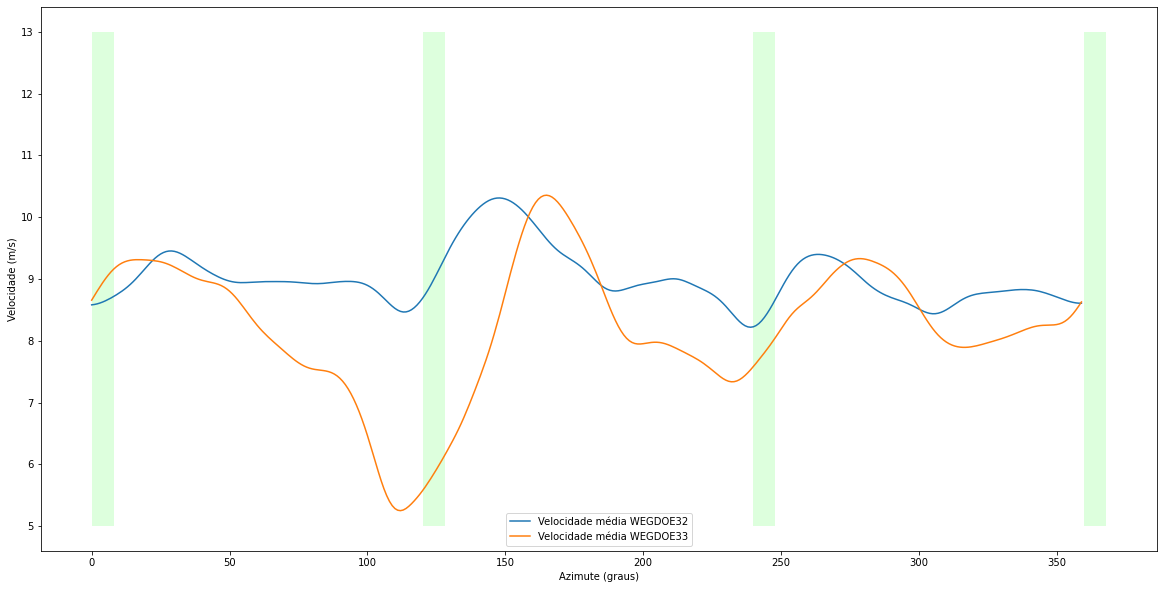

In [20]:
import matplotlib.patches as patches

ax = df_media_velocity_32.plot(x='Azimute (graus)', y="Velocidade média WEGDOE32", figsize=(20,10))
ax.set_ylabel("Velocidade (m/s)")
ax.set_xlabel("Velocidade (m/s)")
rect = patches.Rectangle((0, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((120, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
df_media_velocity_33.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE33")

In [21]:
# df_31 = pd.read_excel("WEGDOE31.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_32 = pd.read_excel("WEGDOE32.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_33 = pd.read_excel("WEGDOE33.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_34 = pd.read_excel("WEGDOE34.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_35 = pd.read_excel("WEGDOE35.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_36 = pd.read_excel("WEGDOE36.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_37 = pd.read_excel("WEGDOE37.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_38 = pd.read_excel("WEGDOE38.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_39 = pd.read_excel("WEGDOE39.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_10 = pd.read_excel("WEGDOE10.xlsx").drop_duplicates(subset='Iteration', keep="last")
df_23 = pd.read_excel("WEGDOE23.xlsx").drop_duplicates(subset='Iteration', keep="last")


In [22]:
df_31 = pd.read_excel("WEGDOE31.xlsx").drop_duplicates(subset='Iteration', keep="last")

In [23]:
df_31 = df_31.loc[1: , :]
df_31

,Unnamed: 0,Time,Iteration,Continuity,X-momentum,Y-momentum,Z-momentum,Tke,Tdr,Anemômetro1(m/s),...,Maximum - anemômetro1 Z+1 j (m/s),Maximum - anemômetro1 Y-1 j (m/s),Maximum - anemômetro1 X-2 i (m/s),Maximum - anemômetro1 X+1 i (m/s),Maximum - anemômetro1 X+2 i (m/s),Maximum - anemômetro1 X-1 i (m/s),Maximum - anemômetro1 Y-1 i (m/s),Maximum - anemômetro1 Y-2 i (m/s),Maximum - anemômetro1 Y+1 i (m/s),Maximum - anemômetro1 Y+2 i (m/s)
1,2,"1,515152e-02",3,0.850137,0.868346,0.146247,0.205175,0.779493,7.530283e-01,9.989802,...,-0.000184,0.013920,9.906408,9.899685,9.907559,9.900681,9.728181,9.900894,9.897840,9.871256
2,3,"3,030303e-02",6,0.794325,0.637198,0.049737,0.066889,0.328962,2.579639e-01,9.958760,...,-0.003467,0.046638,9.916355,9.887312,9.928581,9.902119,9.454959,9.900609,9.879054,9.798098
3,4,"4,545454e-02",9,0.749154,0.600843,0.042198,0.062819,0.148083,7.389754e-02,9.903160,...,-0.017333,0.074565,9.929406,9.861596,9.977342,9.910349,9.171847,9.904944,9.845760,9.693574
4,5,"6,060606e-02",12,0.702710,0.564619,0.037505,0.060409,0.085418,2.072334e-02,9.853343,...,-0.043686,0.078942,9.934916,9.827596,10.049060,9.933973,8.904749,9.921633,9.807035,9.609172
5,6,"7,575758e-02",15,0.652078,0.525883,0.034176,0.055089,0.062475,1.105977e-02,9.844720,...,-0.075302,0.063102,9.927324,9.796196,10.120090,9.974031,8.663575,9.954396,9.779144,9.568760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,5397,"8,175757e+01",16188,0.002732,0.002950,0.002986,0.001285,0.032223,4.890627e-08,9.117485,...,-0.742484,-1.230183,8.225410,8.894408,8.529067,8.861860,6.644981,8.577053,8.353925,7.336623
5397,5398,"8,177273e+01",16191,0.002719,0.002947,0.002988,0.001286,0.032223,4.864227e-08,9.148045,...,-0.886228,-1.312863,8.250698,8.926659,8.589000,8.878277,6.704662,8.600478,8.357681,7.365527
5398,5399,"8,178788e+01",16194,0.002719,0.002956,0.002995,0.001291,0.032223,4.830761e-08,9.178616,...,-1.013962,-1.368984,8.279985,8.941562,8.648296,8.898188,6.760989,8.618243,8.366848,7.404897
5399,5400,"8,180303e+01",16197,0.002711,0.002968,0.002995,0.001292,0.032223,4.766976e-08,9.208468,...,-1.124373,-1.399727,8.313318,8.941270,8.703157,8.920541,6.811925,8.632082,8.381764,7.453265


In [24]:
df_23

,Unnamed: 0,Time,Iteration,Continuity,X-momentum,Y-momentum,Z-momentum,Tke,Tdr,Anem?metro1(m/s),...,Maximum - anem?metro1 Y-1 j (m/s),Maximum - anem?metro1 X-2 i (m/s),Maximum - anem?metro1 X+1 i (m/s),Maximum - anem?metro1 X+2 i (m/s),Maximum - anem?metro1 X-1 i (m/s),Maximum - anem?metro1 Y-1 i (m/s),Maximum - anem?metro1 Y-2 i (m/s),Maximum - anem?metro1 Y+1 i (m/s),Maximum - anem?metro1 Y+2 i (m/s),Total Solver Elapsed Time (s)
0,1,"2,806853e+01",5406,0.023253,0.031812,0.023302,0.023203,0.000330,1.581285e-08,6.701865,...,-0.742671,6.476125,6.457742,6.237892,6.729167,4.964893,6.909572,6.352665,5.861574,16495.77
1,2,"2,808411e+01",5409,0.023126,0.031679,0.023305,0.023217,0.000330,1.579857e-08,6.710660,...,-0.974514,6.495969,6.497063,6.240327,6.716818,4.971590,6.957626,6.318705,5.816561,16499.94
2,3,"2,809969e+01",5412,0.022811,0.031577,0.023329,0.023144,0.000329,1.579739e-08,6.718564,...,-1.182568,6.520591,6.538267,6.248856,6.704460,4.994838,6.997539,6.293619,5.791071,16504.12
3,4,"2,811526e+01",5415,0.022553,0.031387,0.023350,0.023111,0.000329,1.572097e-08,6.726534,...,-1.360201,6.550433,6.577377,6.265325,6.693529,5.029691,7.025906,6.277778,5.785080,16508.32
4,5,"2,813084e+01",5418,0.022463,0.031281,0.023391,0.023102,0.000328,1.565273e-08,6.735698,...,-1.505725,6.584921,6.611328,6.291369,6.685719,5.072262,7.041080,6.270307,5.796143,16512.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,3598,"8,409657e+01",16197,0.021876,0.030923,0.023242,0.023392,0.000326,1.577853e-08,6.712827,...,-0.017883,6.475439,6.422127,6.291130,6.792147,5.065929,6.777196,6.512479,6.096197,31903.09
3598,3599,"8,411215e+01",16200,0.021527,0.030635,0.023229,0.023339,0.000325,1.564363e-08,6.721339,...,-0.257982,6.482077,6.443362,6.280861,6.786844,5.025967,6.822560,6.465746,6.012203,31913.87
3599,3600,"8,412772e+01",16203,0.021656,0.030808,0.023234,0.023355,0.000325,1.558072e-08,6.729305,...,-0.505844,6.494724,6.468719,6.272088,6.778437,5.001265,6.872379,6.420179,5.933334,31917.48
3694,3695,"8,411215e+01",16201,0.020704,0.020460,0.012595,0.011248,0.000161,8.824050e-09,6.723847,...,-0.334739,6.485469,6.450817,6.277872,6.784525,5.016860,6.837774,6.451255,5.986859,31907.67


In [25]:
df_23

,Unnamed: 0,Time,Iteration,Continuity,X-momentum,Y-momentum,Z-momentum,Tke,Tdr,Anem?metro1(m/s),...,Maximum - anem?metro1 Y-1 j (m/s),Maximum - anem?metro1 X-2 i (m/s),Maximum - anem?metro1 X+1 i (m/s),Maximum - anem?metro1 X+2 i (m/s),Maximum - anem?metro1 X-1 i (m/s),Maximum - anem?metro1 Y-1 i (m/s),Maximum - anem?metro1 Y-2 i (m/s),Maximum - anem?metro1 Y+1 i (m/s),Maximum - anem?metro1 Y+2 i (m/s),Total Solver Elapsed Time (s)
0,1,"2,806853e+01",5406,0.023253,0.031812,0.023302,0.023203,0.000330,1.581285e-08,6.701865,...,-0.742671,6.476125,6.457742,6.237892,6.729167,4.964893,6.909572,6.352665,5.861574,16495.77
1,2,"2,808411e+01",5409,0.023126,0.031679,0.023305,0.023217,0.000330,1.579857e-08,6.710660,...,-0.974514,6.495969,6.497063,6.240327,6.716818,4.971590,6.957626,6.318705,5.816561,16499.94
2,3,"2,809969e+01",5412,0.022811,0.031577,0.023329,0.023144,0.000329,1.579739e-08,6.718564,...,-1.182568,6.520591,6.538267,6.248856,6.704460,4.994838,6.997539,6.293619,5.791071,16504.12
3,4,"2,811526e+01",5415,0.022553,0.031387,0.023350,0.023111,0.000329,1.572097e-08,6.726534,...,-1.360201,6.550433,6.577377,6.265325,6.693529,5.029691,7.025906,6.277778,5.785080,16508.32
4,5,"2,813084e+01",5418,0.022463,0.031281,0.023391,0.023102,0.000328,1.565273e-08,6.735698,...,-1.505725,6.584921,6.611328,6.291369,6.685719,5.072262,7.041080,6.270307,5.796143,16512.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,3598,"8,409657e+01",16197,0.021876,0.030923,0.023242,0.023392,0.000326,1.577853e-08,6.712827,...,-0.017883,6.475439,6.422127,6.291130,6.792147,5.065929,6.777196,6.512479,6.096197,31903.09
3598,3599,"8,411215e+01",16200,0.021527,0.030635,0.023229,0.023339,0.000325,1.564363e-08,6.721339,...,-0.257982,6.482077,6.443362,6.280861,6.786844,5.025967,6.822560,6.465746,6.012203,31913.87
3599,3600,"8,412772e+01",16203,0.021656,0.030808,0.023234,0.023355,0.000325,1.558072e-08,6.729305,...,-0.505844,6.494724,6.468719,6.272088,6.778437,5.001265,6.872379,6.420179,5.933334,31917.48
3694,3695,"8,411215e+01",16201,0.020704,0.020460,0.012595,0.011248,0.000161,8.824050e-09,6.723847,...,-0.334739,6.485469,6.450817,6.277872,6.784525,5.016860,6.837774,6.451255,5.986859,31907.67


In [26]:
import math

def calculate_average_direction_anemometers(row):
    direction_x_1 = math.atan(row[" Maximum - anem?metro1 X-1 j (m/s)"]/row[" Maximum - anem?metro1 X-1 i (m/s)"])
    direction_x_2 = math.atan(row[" Maximum - anem?metro1 X-2 j (m/s)"]/row[" Maximum - anem?metro1 X-2 i (m/s)"])
#     direction_y_1 = math.atan(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    direction_y_2 = math.atan(row[" Maximum - anem?metro1 Y-2 j (m/s)"]/row[" Maximum - anem?metro1 Y-2 i (m/s)"])
    direction_z_1 = math.atan(row[" Maximum - anem?metro1 Z-1 j (m/s)"]/row[" Maximum - anem?metro1 Z-1 i (m/s)"])
    direction_x1 = math.atan(row[" Maximum - anem?metro1 X+1 j (m/s)"]/row[" Maximum - anem?metro1 X+1 i (m/s)"])
    direction_x2 = math.atan(row[" Maximum - anem?metro1 X+2 j (m/s)"]/row[" Maximum - anem?metro1 X+2 i (m/s)"])
    direction_y1 = math.atan(row[" Maximum - anem?metro1 Y+1 j (m/s)"]/row[" Maximum - anem?metro1 Y+1 i (m/s)"])
    direction_y2 = math.atan(row[" Maximum - anem?metro1 Y+2 j (m/s)"]/row[" Maximum - anem?metro1 Y+2 i (m/s)"])
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    direction = math.atan(row[" Anem?metro1 j (m/s)"]/row[" Anem?metro1 i (m/s)"])
    return math.degrees(((direction_x_1+direction_x_2+direction_y_2+direction_z_1+direction_x1+direction_x2+direction_y1+
           direction_y2+direction)/9))

In [27]:
import math

def calculate_average_direction_anemometers_complete_name(row):
    direction_x_1 = math.atan(row[" Maximum - anemômetro1 X-1 j (m/s)"]/row[" Maximum - anemômetro1 X-1 i (m/s)"])
    direction_x_2 = math.atan(row[" Maximum - anemômetro1 X-2 j (m/s)"]/row[" Maximum - anemômetro1 X-2 i (m/s)"])
#     direction_y_1 = math.atan(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    direction_y_2 = math.atan(row[" Maximum - anemômetro1 Y-2 j (m/s)"]/row[" Maximum - anemômetro1 Y-2 i (m/s)"])
    direction_z_1 = math.atan(row[" Maximum - anemômetro1 Z-1 j (m/s)"]/row[" Maximum - anemômetro1 Z-1 i (m/s)"])
    direction_x1 = math.atan(row[" Maximum - anemômetro1 X+1 j (m/s)"]/row[" Maximum - anemômetro1 X+1 i (m/s)"])
    direction_x2 = math.atan(row[" Maximum - anemômetro1 X+2 j (m/s)"]/row[" Maximum - anemômetro1 X+2 i (m/s)"])
    direction_y1 = math.atan(row[" Maximum - anemômetro1 Y+1 j (m/s)"]/row[" Maximum - anemômetro1 Y+1 i (m/s)"])
    direction_y2 = math.atan(row[" Maximum - anemômetro1 Y+2 j (m/s)"]/row[" Maximum - anemômetro1 Y+2 i (m/s)"])
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    direction = math.atan(row[" Anemômetro1 j (m/s)"]/row[" Anemômetro1 i (m/s)"])
    return math.degrees(((direction_x_1+direction_x_2+direction_y_2+direction_z_1+direction_x1+direction_x2+direction_y1+
           direction_y2+direction)/9))

In [28]:
import math

def calculate_average_velocity_anemometers(row):
    velocity_x_1 = math.sqrt((row[" Maximum - anem?metro1 X-1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X-1 i (m/s)"]**2))
    velocity_x_2 = math.sqrt((row[" Maximum - anem?metro1 X-2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X-2 i (m/s)"]**2))
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = math.sqrt((row[" Maximum - anem?metro1 Y-2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Y-2 i (m/s)"]**2))
    velocity_z_1 = math.sqrt((row[" Maximum - anem?metro1 Z-1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Z-1 i (m/s)"]**2))
    velocity_x1 = math.sqrt((row[" Maximum - anem?metro1 X+1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X+1 i (m/s)"]**2))
    velocity_x2 = math.sqrt((row[" Maximum - anem?metro1 X+2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 X+2 i (m/s)"]**2))
    velocity_y1 = math.sqrt((row[" Maximum - anem?metro1 Y+1 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Y+1 i (m/s)"]**2))
    velocity_y2 = math.sqrt((row[" Maximum - anem?metro1 Y+2 j (m/s)"]**2)+(row[" Maximum - anem?metro1 Y+2 i (m/s)"]**2))
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = math.sqrt((row[" Anem?metro1 j (m/s)"]**2)+(row[" Anem?metro1 i (m/s)"]**2))
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

In [29]:
import math

def calculate_average_velocity_anemometers_complete_name(row):
    velocity_x_1 = math.sqrt((row[" Maximum - anemômetro1 X-1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X-1 i (m/s)"]**2))
    velocity_x_2 = math.sqrt((row[" Maximum - anemômetro1 X-2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X-2 i (m/s)"]**2))
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = math.sqrt((row[" Maximum - anemômetro1 Y-2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Y-2 i (m/s)"]**2))
    velocity_z_1 = math.sqrt((row[" Maximum - anemômetro1 Z-1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Z-1 i (m/s)"]**2))
    velocity_x1 = math.sqrt((row[" Maximum - anemômetro1 X+1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X+1 i (m/s)"]**2))
    velocity_x2 = math.sqrt((row[" Maximum - anemômetro1 X+2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 X+2 i (m/s)"]**2))
    velocity_y1 = math.sqrt((row[" Maximum - anemômetro1 Y+1 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Y+1 i (m/s)"]**2))
    velocity_y2 = math.sqrt((row[" Maximum - anemômetro1 Y+2 j (m/s)"]**2)+(row[" Maximum - anemômetro1 Y+2 i (m/s)"]**2))
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = math.sqrt((row[" Anemômetro1 j (m/s)"]**2)+(row[" Anemômetro1 i (m/s)"]**2))
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

In [30]:
import math

def calculate_velocity_y_anemometers(row):
    velocity_x_1 = row[" Maximum - anem?metro1 X-1 j (m/s)"]
    velocity_x_2 = row[" Maximum - anem?metro1 X-2 j (m/s)"]
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = row[" Maximum - anem?metro1 Y-2 j (m/s)"]
    velocity_z_1 = row[" Maximum - anem?metro1 Z-1 j (m/s)"]
    velocity_x1 = row[" Maximum - anem?metro1 X+1 j (m/s)"]
    velocity_x2 = row[" Maximum - anem?metro1 X+2 j (m/s)"]
    velocity_y1 = row[" Maximum - anem?metro1 Y+1 j (m/s)"]
    velocity_y2 = row[" Maximum - anem?metro1 Y+2 j (m/s)"]
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = row[" Anem?metro1 j (m/s)"]
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

In [31]:
import math

def calculate_velocity_x_anemometers(row):
    velocity_x_1 = row[" Maximum - anem?metro1 X-1 i (m/s)"]
    velocity_x_2 = row[" Maximum - anem?metro1 X-2 i (m/s)"]
#     direction_y_1 = math.sqrt(row[" Maximum - anem?metro1 Y-1 j (m/s)"]/row[" Maximum - anem?metro1 Y-1 i (m/s)"])
    velocity_y_2 = row[" Maximum - anem?metro1 Y-2 i (m/s)"]
    velocity_z_1 = row[" Maximum - anem?metro1 Z-1 i (m/s)"]
    velocity_x1 = row[" Maximum - anem?metro1 X+1 i (m/s)"]
    velocity_x2 = row[" Maximum - anem?metro1 X+2 i (m/s)"]
    velocity_y1 = row[" Maximum - anem?metro1 Y+1 i (m/s)"]
    velocity_y2 = row[" Maximum - anem?metro1 Y+2 i (m/s)"]
#     direction_z1 = math.atan(row[" Maximum - anem?metro1 Z+1 j (m/s)"]/row[" Maximum - anem?metro1 Z+1 i (m/s)"])
    velocity = row[" Anem?metro1 i (m/s)"]
    return (velocity_x_1+velocity_x_2+velocity_y_2+velocity_z_1+velocity_x1+velocity_x2+velocity_y1+
           velocity_y2+velocity)/9

In [32]:
# df_31["Direção média"] = df_31.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_32["Direção média"] = df_32.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_33["Direção média"] = df_33.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_34["Direção média"] = df_34.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_35["Direção média"] = df_35.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_36["Direção média"] = df_36.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_37["Direção média"] = df_37.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_38["Direção média"] = df_38.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_39["Direção média"] = df_39.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_10["Direção média"] = df_10.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_23["Direção média"] = df_23.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)

In [33]:
# df_31["Direção média"] = df_31.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_32["Velocidade média"] = df_32.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_33["Velocidade média"] = df_33.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_34["Velocidade média"] = df_34.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_35["Velocidade média"] = df_35.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_36["Velocidade média"] = df_36.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_37["Velocidade média"] = df_37.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_38["Velocidade média"] = df_38.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_39["Velocidade média"] = df_39.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_10["Velocidade média"] = df_10.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)
df_23["Velocidade média"] = df_23.apply(lambda row: calculate_average_velocity_anemometers(row), axis=1)

In [34]:
# df_31["Direção média"] = df_31.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_32["Velocidade média x"] = df_32.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_33["Velocidade média x"] = df_33.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_34["Velocidade média x"] = df_34.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_35["Velocidade média x"] = df_35.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_36["Velocidade média x"] = df_36.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_37["Velocidade média x"] = df_37.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_38["Velocidade média x"] = df_38.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_39["Velocidade média x"] = df_39.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_10["Velocidade média x"] = df_10.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)
df_23["Velocidade média x"] = df_23.apply(lambda row: calculate_velocity_x_anemometers(row), axis=1)

In [35]:
# df_31["Direção média"] = df_31.apply(lambda row: calculate_average_direction_anemometers(row), axis=1)
df_32["Velocidade média y"] = df_32.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_33["Velocidade média y"] = df_33.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_34["Velocidade média y"] = df_34.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_35["Velocidade média y"] = df_35.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_36["Velocidade média y"] = df_36.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_37["Velocidade média y"] = df_37.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_38["Velocidade média y"] = df_38.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_39["Velocidade média y"] = df_39.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_10["Velocidade média y"] = df_10.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)
df_23["Velocidade média y"] = df_23.apply(lambda row: calculate_velocity_y_anemometers(row), axis=1)

In [36]:
df_31["Direção média"] = df_31.apply(lambda row: calculate_average_direction_anemometers_complete_name(row), axis=1)
df_31["Velocidade média"] = df_31.apply(lambda row: calculate_average_velocity_anemometers_complete_name(row), axis=1)

In [37]:
df_31

,Unnamed: 0,Time,Iteration,Continuity,X-momentum,Y-momentum,Z-momentum,Tke,Tdr,Anemômetro1(m/s),...,Maximum - anemômetro1 X-2 i (m/s),Maximum - anemômetro1 X+1 i (m/s),Maximum - anemômetro1 X+2 i (m/s),Maximum - anemômetro1 X-1 i (m/s),Maximum - anemômetro1 Y-1 i (m/s),Maximum - anemômetro1 Y-2 i (m/s),Maximum - anemômetro1 Y+1 i (m/s),Maximum - anemômetro1 Y+2 i (m/s),Direção média,Velocidade média
1,2,"1,515152e-02",3,0.850137,0.868346,0.146247,0.205175,0.779493,7.530283e-01,9.989802,...,9.906408,9.899685,9.907559,9.900681,9.728181,9.900894,9.897840,9.871256,0.001316,9.898542
2,3,"3,030303e-02",6,0.794325,0.637198,0.049737,0.066889,0.328962,2.579639e-01,9.958760,...,9.916355,9.887312,9.928581,9.902119,9.454959,9.900609,9.879054,9.798098,-0.000974,9.888809
3,4,"4,545454e-02",9,0.749154,0.600843,0.042198,0.062819,0.148083,7.389754e-02,9.903160,...,9.929406,9.861596,9.977342,9.910349,9.171847,9.904944,9.845760,9.693574,-0.002223,9.874349
4,5,"6,060606e-02",12,0.702710,0.564619,0.037505,0.060409,0.085418,2.072334e-02,9.853343,...,9.934916,9.827596,10.049060,9.933973,8.904749,9.921633,9.807035,9.609172,-0.005301,9.862140
5,6,"7,575758e-02",15,0.652078,0.525883,0.034176,0.055089,0.062475,1.105977e-02,9.844720,...,9.927324,9.796196,10.120090,9.974031,8.663575,9.954396,9.779144,9.568760,-0.018222,9.856988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396,5397,"8,175757e+01",16188,0.002732,0.002950,0.002986,0.001285,0.032223,4.890627e-08,9.117485,...,8.225410,8.894408,8.529067,8.861860,6.644981,8.577053,8.353925,7.336623,-7.479818,8.556213
5397,5398,"8,177273e+01",16191,0.002719,0.002947,0.002988,0.001286,0.032223,4.864227e-08,9.148045,...,8.250698,8.926659,8.589000,8.878277,6.704662,8.600478,8.357681,7.365527,-8.168313,8.586856
5398,5399,"8,178788e+01",16194,0.002719,0.002956,0.002995,0.001291,0.032223,4.830761e-08,9.178616,...,8.279985,8.941562,8.648296,8.898188,6.760989,8.618243,8.366848,7.404897,-8.768023,8.615205
5399,5400,"8,180303e+01",16197,0.002711,0.002968,0.002995,0.001292,0.032223,4.766976e-08,9.208468,...,8.313318,8.941270,8.703157,8.920541,6.811925,8.632082,8.381764,7.453265,-9.273398,8.641120


In [38]:
azimute = []
for i in range(0, 360):
    azimute.append(i)

In [45]:
media_df_33_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE33 - Inflow de 8 graus": []}
media_df_31_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE31 - Inflow de -8 graus": []}
media_df_36_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE36 - Inflow de 0 graus": []}


media_df_33_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE33 - Inflow de 8 graus": []}
media_df_31_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE31 - Inflow de -8 graus": []}
media_df_36_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE36 - Inflow de 0 graus": []}


for i in range(3600, 3600+360):
    media_df_31_direction["Direção média WEGDOE31 - Inflow de -8 graus"].append(df_31[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_33_direction["Direção média WEGDOE33 - Inflow de 8 graus"].append(df_33[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_31_velocity["Velocidade média WEGDOE31 - Inflow de -8 graus"].append(df_31[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_33_velocity["Velocidade média WEGDOE33 - Inflow de 8 graus"].append(df_33[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    
for i in range (1800, 1800+360):
    media_df_36_direction["Direção média WEGDOE36 - Inflow de 0 graus"].append(df_36[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_36_velocity["Velocidade média WEGDOE36 - Inflow de 0 graus"].append(df_36[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())



df_media_direction_31 = pd.DataFrame.from_dict(media_df_31_direction)
df_media_direction_33 = pd.DataFrame.from_dict(media_df_33_direction)
df_media_velocity_31 = pd.DataFrame.from_dict(media_df_31_velocity)
df_media_velocity_33 = pd.DataFrame.from_dict(media_df_33_velocity)
df_media_direction_36 = pd.DataFrame.from_dict(media_df_36_direction)
df_media_velocity_36 = pd.DataFrame.from_dict(media_df_36_velocity)


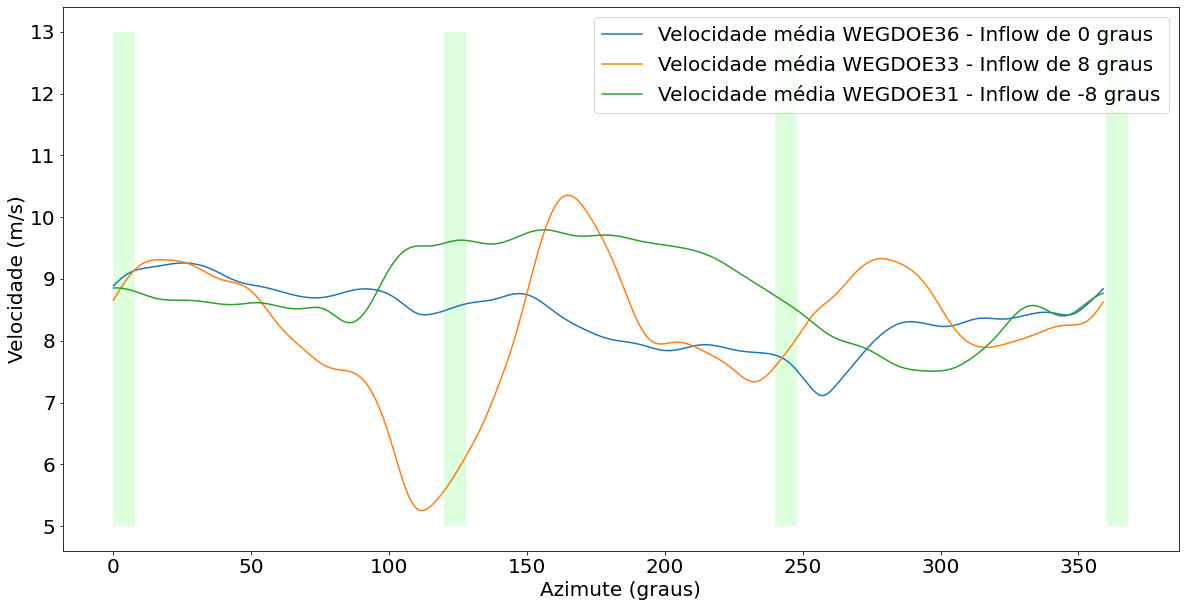

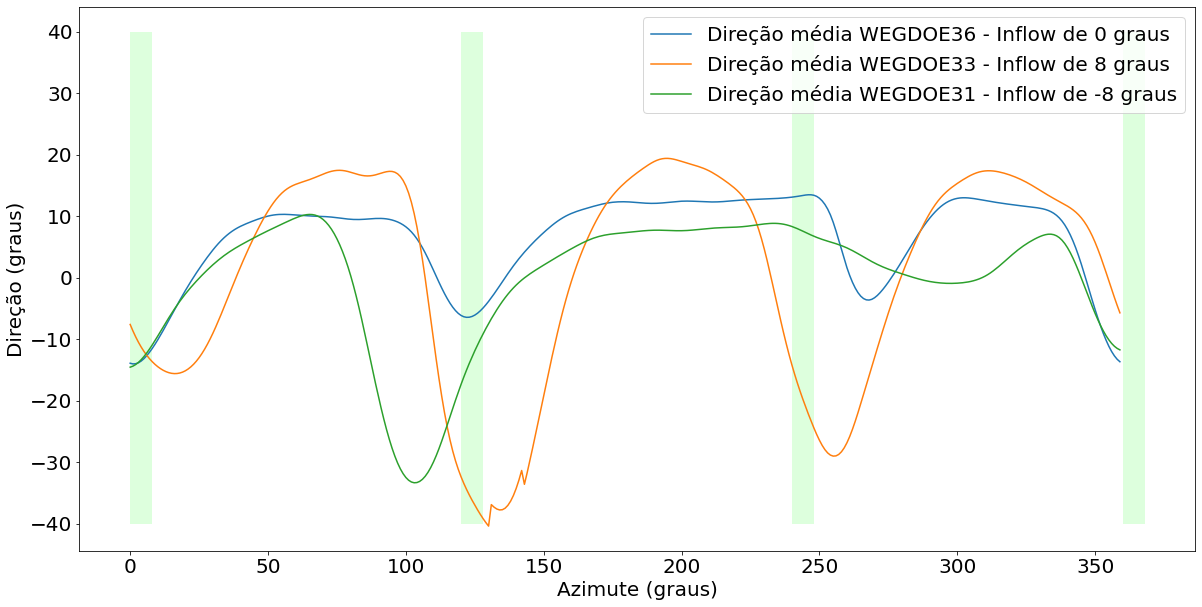

In [73]:
df_media_velocity_36["Velocidade média WEGDOE36 - Inflow de 0 graus"]=df_media_velocity_36["Velocidade média WEGDOE36 - Inflow de 0 graus"].astype(float)
df_media_velocity_33["Velocidade média WEGDOE33 - Inflow de 8 graus"]=df_media_velocity_33["Velocidade média WEGDOE33 - Inflow de 8 graus"].astype(float)
df_media_velocity_31["Velocidade média WEGDOE31 - Inflow de -8 graus"]=df_media_velocity_31["Velocidade média WEGDOE31 - Inflow de -8 graus"].astype(float)


ax = df_media_velocity_36.plot(x='Azimute (graus)', y="Velocidade média WEGDOE36 - Inflow de 0 graus", figsize=(20,10), fontsize=20)
ax.set_ylabel("Velocidade (m/s)", fontsize=20)
ax.set_xlabel("Azimute (graus)", fontsize=20)

rect = patches.Rectangle((0, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
df_media_velocity_33.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE33 - Inflow de 8 graus")
df_media_velocity_31.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE31 - Inflow de -8 graus")
ax.legend(fontsize=20)



df_media_direction_36["Direção média WEGDOE36 - Inflow de 0 graus"]=df_media_direction_36["Direção média WEGDOE36 - Inflow de 0 graus"].astype(float)
df_media_direction_33["Direção média WEGDOE33 - Inflow de 8 graus"]=df_media_direction_33["Direção média WEGDOE33 - Inflow de 8 graus"].astype(float)
df_media_direction_31["Direção média WEGDOE31 - Inflow de -8 graus"]=df_media_direction_31["Direção média WEGDOE31 - Inflow de -8 graus"].astype(float)


ax = df_media_direction_36.plot(x='Azimute (graus)', y="Direção média WEGDOE36 - Inflow de 0 graus", figsize=(20,10), fontsize=20)
ax.set_ylabel("Direção (graus)", fontsize=20)
ax.set_xlabel("Azimute (graus)", fontsize=20)


rect = patches.Rectangle((0, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, -40), 8, 80, linewidth=1,  edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)

df_media_direction_33.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE33 - Inflow de 8 graus")
df_media_direction_31.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE31 - Inflow de -8 graus")

ax.legend(fontsize=20)



In [75]:
# media_df_10_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE10 - Velocidade de 6 m/s": []}
# media_df_23_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE23 - Velocidade de 8 m/s": []}
media_df_36_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE36 - Direção do vento 0 graus": []}
media_df_37_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE37 - Direção do vento -15 graus": []}
media_df_39_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE39 - Direção do vento 15 graus": []}

media_df_36_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE36 - Direção do vento 0 graus": []}
media_df_37_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE37 - Direção do vento -15 graus": []}
media_df_39_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE39 - Direção do vento 15 graus": []}




# df_23

for i in range(3600, 3600+360):
#     media_df_10_velocity["Velocidade média WEGDOE10 - Velocidade de 6 m/s"].append(df_10[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_36_velocity["Velocidade média WEGDOE36 - Direção do vento 0 graus"].append(df_36[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_37_velocity["Velocidade média WEGDOE37 - Direção do vento -15 graus"].append(df_37[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_39_velocity["Velocidade média WEGDOE39 - Direção do vento 15 graus"].append(df_39[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())

    media_df_37_direction["Direção média WEGDOE37 - Direção do vento -15 graus"].append(df_37[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_39_direction["Direção média WEGDOE39 - Direção do vento 15 graus"].append(df_39[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())

for i in range (1800, 1800+360):
    media_df_36_direction["Direção média WEGDOE36 - Direção do vento 0 graus"].append(df_36[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_36_velocity["Velocidade média WEGDOE36 - Direção do vento 0 graus"].append(df_36[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())


df_media_direction_36 = pd.DataFrame.from_dict(media_df_36_direction)


df_media_velocity_37 = pd.DataFrame.from_dict(media_df_37_velocity)
df_media_velocity_39 = pd.DataFrame.from_dict(media_df_39_velocity)
df_media_direction_37 = pd.DataFrame.from_dict(media_df_37_direction)
df_media_direction_39 = pd.DataFrame.from_dict(media_df_39_direction)


df_media_velocity_36 = pd.DataFrame.from_dict(media_df_36_velocity)


In [76]:
# df_media_velocity_10 = pd.DataFrame.from_dict(media_df_10_velocity)
# df_media_velocity_23 = pd.DataFrame.from_dict(media_df_23_velocity)
# df_media_velocity_36 = pd.DataFrame.from_dict(media_df_36_velocity)
df_media_velocity_31 = pd.DataFrame.from_dict(media_df_36_velocity)


df_media_velocity_37 = pd.DataFrame.from_dict(media_df_37_velocity)
df_media_velocity_39 = pd.DataFrame.from_dict(media_df_39_velocity)
df_media_velocity_36 = pd.DataFrame.from_dict(media_df_36_velocity)

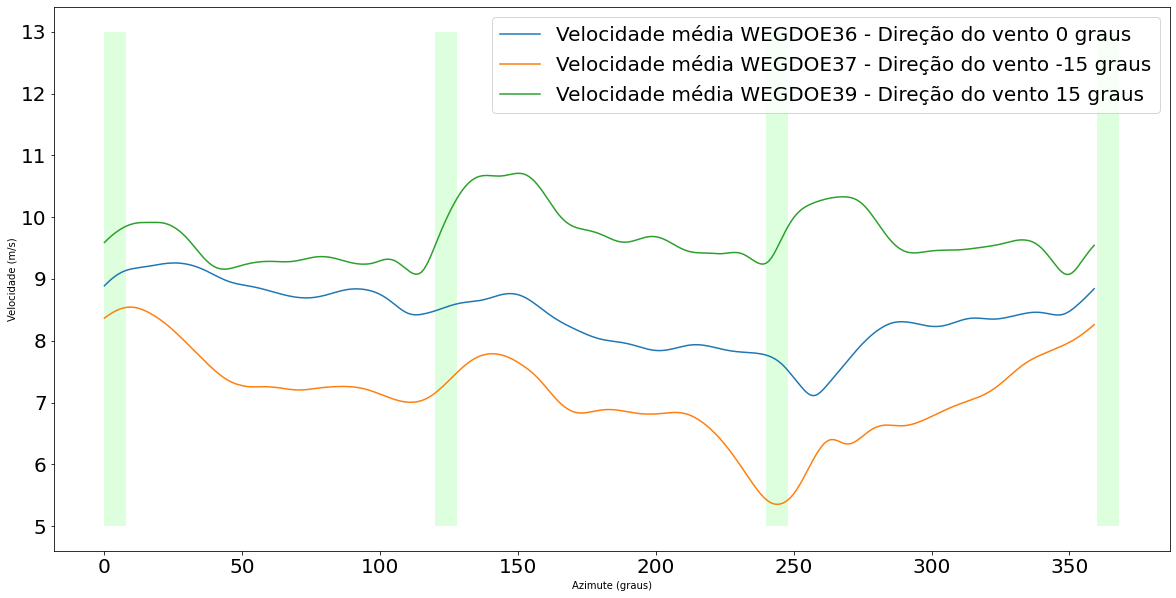

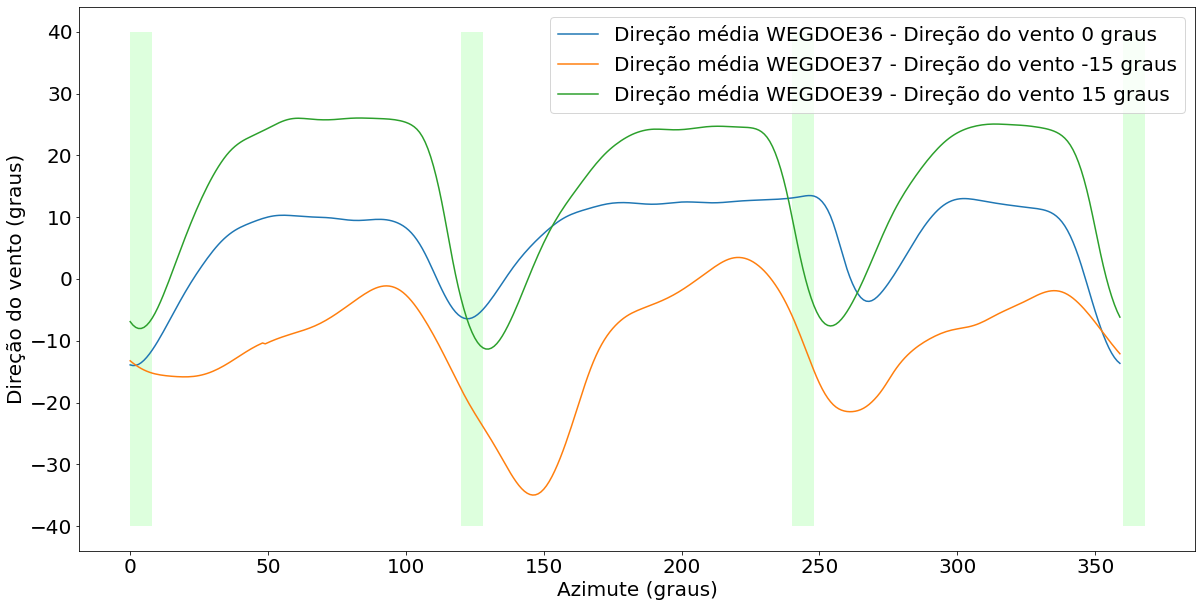

In [81]:
# df_media_velocity_10["Velocidade média WEGDOE10 - Velocidade de 6 m/s"]=df_media_velocity_10["Velocidade média WEGDOE10 - Velocidade de 6 m/s"].astype(float)
# df_media_velocity_23["Velocidade média WEGDOE23 - Velocidade de 8 m/s"]=df_media_velocity_23["Velocidade média WEGDOE23 - Velocidade de 8 m/s"].astype(float)
# df_media_velocity_36["Velocidade média WEGDOE36 - Velocidade de 10 m/s"]=df_media_velocity_36["Velocidade média WEGDOE36 - Velocidade de 10 m/s"].astype(float)
# ax = df_media_velocity_10.plot(x='Azimute (graus)', y="Velocidade média WEGDOE10 - Velocidade de 6 m/s", figsize=(20,10), fontsize=20)
# ax.set_ylabel("Velocidade (m/s)", fontsize=20)
# ax.set_xlabel("Azimute (graus)", fontsize=20)
# df_media_velocity_23.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE23 - Velocidade de 8 m/s")
# df_media_velocity_36.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE36 - Velocidade de 10 m/s")
import matplotlib.patches as patches

df_media_velocity_39["Velocidade média WEGDOE39 - Direção do vento 15 graus"]=df_media_velocity_39["Velocidade média WEGDOE39 - Direção do vento 15 graus"].astype(float)
df_media_velocity_37["Velocidade média WEGDOE37 - Direção do vento -15 graus"]=df_media_velocity_37["Velocidade média WEGDOE37 - Direção do vento -15 graus"].astype(float)
df_media_velocity_36["Velocidade média WEGDOE36 - Direção do vento 0 graus"]=df_media_velocity_36["Velocidade média WEGDOE36 - Direção do vento 0 graus"].astype(float)
ax = df_media_velocity_36.plot(x='Azimute (graus)', y="Velocidade média WEGDOE36 - Direção do vento 0 graus", figsize=(20,10), fontsize=20)
ax.set_ylabel("Velocidade (m/s)")
# Create a Rectangle patch
rect = patches.Rectangle((0, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, 5), 8, 8, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)

df_media_velocity_37.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE37 - Direção do vento -15 graus")
df_media_velocity_39.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE39 - Direção do vento 15 graus")
ax.legend(fontsize=20)


import matplotlib.patches as patches

df_media_direction_39["Direção média WEGDOE39 - Direção do vento 15 graus"]=df_media_direction_39["Direção média WEGDOE39 - Direção do vento 15 graus"].astype(float)
df_media_direction_37["Direção média WEGDOE37 - Direção do vento -15 graus"]=df_media_direction_37["Direção média WEGDOE37 - Direção do vento -15 graus"].astype(float)
df_media_direction_36["Direção média WEGDOE36 - Direção do vento 0 graus"]=df_media_direction_36["Direção média WEGDOE36 - Direção do vento 0 graus"].astype(float)
ax = df_media_direction_36.plot(x='Azimute (graus)', y="Direção média WEGDOE36 - Direção do vento 0 graus", figsize=(20,10), fontsize=20)
ax.set_xlabel("Azimute (graus)", fontsize=20)
ax.set_ylabel("Direção do vento (graus)", fontsize=20)
# Create a Rectangle patch
rect = patches.Rectangle((0, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)


df_media_direction_37.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE37 - Direção do vento -15 graus")
df_media_direction_39.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE39 - Direção do vento 15 graus")
ax.legend(fontsize=20)



In [ ]:
media_df_36_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE36 - Inflow de 0 graus": []}

for i in range (1800, 1800+360):
    media_df_36_velocity["Velocidade média WEGDOE36 - Inflow de 0 graus"].append(df_36[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())



In [ ]:
df_media_velocity_31 = pd.DataFrame.from_dict(media_df_31_velocity)
df_media_velocity_33 = pd.DataFrame.from_dict(media_df_33_velocity)
df_media_velocity_36 = pd.DataFrame.from_dict(media_df_36_velocity)

In [ ]:

df_media_velocity_31["Direção média WEGDOE36 - Direção do vento 0 graus"]=df_media_direction_36["Direção média WEGDOE36 - Direção do vento 0 graus"].astype(float)
df_media_direction_37["Direção média WEGDOE37 - Direção do vento -15 graus"]=df_media_direction_37["Direção média WEGDOE37 - Direção do vento -15 graus"].astype(float)
df_media_direction_39["Direção média WEGDOE39 - Direção do vento 15 graus"]=df_media_direction_39["Direção média WEGDOE39 - Direção do vento 15 graus"].astype(float)


ax = df_media_direction_36.plot(x='Azimute', y="Direção média WEGDOE36 - Direção do vento 0 graus", figsize=(20,10))
rect = patches.Rectangle((0, -40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, -40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((240,-40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((360,-40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
df_media_direction_37.plot(ax=ax, x='Azimute', y="Direção média WEGDOE37 - Direção do vento -15 graus")
df_media_direction_39.plot(ax=ax, x='Azimute', y="Direção média WEGDOE39 - Direção do vento 15 graus")

In [ ]:
df_media_velocity_36["Velocidade média WEGDOE36 - Inflow de 0 graus"]=df_media_velocity_36["Velocidade média WEGDOE36 - Inflow de 0 graus"].astype(float)
df_media_velocity_33["Velocidade média WEGDOE33 - Inflow de 8 graus"]=df_media_velocity_33["Velocidade média WEGDOE33 - Inflow de 8 graus"].astype(float)
df_media_velocity_31["Velocidade média WEGDOE31 - Inflow de -8 graus"]=df_media_velocity_31["Velocidade média WEGDOE31 - Inflow de -8 graus"].astype(float)


ax = df_media_velocity_36.plot(x='Azimute (graus)', y="Velocidade média WEGDOE36 - Inflow de 0 graus", figsize=(20,10))
ax.set_ylabel("Velocidade (m/s)")
rect = patches.Rectangle((0, 5), 8, 8, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, 5), 8, 8, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((240, 5), 8, 8, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((360, 5), 8, 8, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
df_media_velocity_33.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE33 - Inflow de 8 graus")
df_media_velocity_31.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE31 - Inflow de -8 graus")

In [ ]:
# media_df_32_direction = {"Azimute": azimute, "Direção média": []}
media_df_33_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE33 - Direção do vento 15 graus": []}
# media_df_34_direction = {"Azimute": azimute, "Direção média": []}
# media_df_35_direction = {"Azimute": azimute, "Direção média": []}
media_df_37_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE37 - Direção do vento -15 graus": []}
# media_df_38_direction = {"Azimute": azimute, "Direção média": []}
media_df_39_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE39 - Direção do vento 15 graus": []}
media_df_10_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE10 - Velocidade de 6 m/s": []}
# media_df_31_direction = {"Azimute": azimute, "Direção média WEGDOE31 - Inflow de -8 graus": []}




for i in range(3600, 3600+360):
#     media_df_32_direction["Direção média"].append(df_32[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_33_direction["Direção média WEGDOE33 - Direção do vento 15 graus"].append(df_33[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_34_direction["Direção média"].append(df_34[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_35_direction["Direção média"].append(df_35[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_37_direction["Direção média WEGDOE37 - Direção do vento -15 graus"].append(df_37[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_37_direction["Direção média WEGDOE37 - Direção do vento -15 graus"].append(df_37[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())


#     media_df_38_direction["Direção média"].append(df_38[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_39_direction["Direção média WEGDOE39 - Direção do vento 15 graus"].append(df_39[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_10_direction["Direção média WEGDOE10 - Velocidade de 6 m/s"].append(df_10[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_31_direction["Direção média WEGDOE31 - Inflow de -8 graus"].append(df_31[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_33_direction["Direção média WEGDOE33 - Inflow de 8 graus"].append(df_33[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())




    

In [ ]:
# df_media_direction_32 = pd.DataFrame.from_dict(media_df_32_direction)
# df_media_direction_31 = pd.DataFrame.from_dict(media_df_31_direction)
# df_media_direction_34 = pd.DataFrame.from_dict(media_df_34_direction)
# df_media_direction_35 = pd.DataFrame.from_dict(media_df_35_direction)
# df_media_direction_37 = pd.DataFrame.from_dict(media_df_37_direction)
# df_media_direction_38 = pd.DataFrame.from_dict(media_df_38_direction)
# df_media_direction_39 = pd.DataFrame.from_dict(media_df_39_direction)
df_media_direction_10 = pd.DataFrame.from_dict(media_df_10_direction)

df_media_direction_33 = pd.DataFrame.from_dict(media_df_33_direction)



In [86]:
# media_df_36_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE36 - Direção do vento 0 graus": []}
# media_df_23_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE23 - Velocidade de 8 m/s": []}
# media_df_36_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE36 - Velocidade de 10 m/s": []}
media_df_10_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE10 - Velocidade de 6 m/s": []}
media_df_10_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE10 - Velocidade de 6 m/s": []}
media_df_23_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE23 - Velocidade de 8 m/s": []}
media_df_23_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE23 - Velocidade de 8 m/s": []}
media_df_36_direction = {"Azimute (graus)": azimute, "Direção média WEGDOE36 - Velocidade de 10 m/s": []}
media_df_36_velocity = {"Azimute (graus)": azimute, "Velocidade média WEGDOE36 - Velocidade de 10 m/s": []}



for i in range(3600, 3600+360):
#     media_df_32_direction["Direção média"].append(df_32[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_33_direction["Direção média WEGDOE33 - Direção do vento 15 graus"].append(df_33[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_34_direction["Direção média"].append(df_34[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_35_direction["Direção média"].append(df_35[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_37_direction["Direção média WEGDOE37 - Direção do vento -15 graus"].append(df_37[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_37_direction["Direção média WEGDOE37 - Direção do vento -15 graus"].append(df_37[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())


#     media_df_38_direction["Direção média"].append(df_38[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_39_direction["Direção média WEGDOE39 - Direção do vento 15 graus"].append(df_39[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_10_direction["Direção média WEGDOE10 - Velocidade de 6 m/s"].append(df_10[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_10_velocity["Velocidade média WEGDOE10 - Velocidade de 6 m/s"].append(df_10[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())


#     media_df_31_direction["Direção média WEGDOE31 - Inflow de -8 graus"].append(df_31[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
#     media_df_33_direction["Direção média WEGDOE33 - Inflow de 8 graus"].append(df_33[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())





for i in range (1800, 1800+360):
    media_df_36_direction["Direção média WEGDOE36 - Velocidade de 10 m/s"].append(df_36[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_23_direction["Direção média WEGDOE23 - Velocidade de 8 m/s"].append(df_23[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_36_velocity["Velocidade média WEGDOE36 - Velocidade de 10 m/s"].append(df_36[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())
    media_df_23_velocity["Velocidade média WEGDOE23 - Velocidade de 8 m/s"].append(df_23[['Velocidade média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())


#     media_df_36_direction["Direção média WEGDOE36 - Direção do vento 0 graus"].append(df_36[['Direção média']].iloc[[i,i+360,i+720,i+1080,i+1440]].mean())


df_media_direction_10 = pd.DataFrame.from_dict(media_df_10_direction)

df_media_velocity_10 = pd.DataFrame.from_dict(media_df_10_velocity)

df_media_direction_23 = pd.DataFrame.from_dict(media_df_23_direction)

df_media_velocity_23 = pd.DataFrame.from_dict(media_df_23_velocity)


df_media_direction_36 = pd.DataFrame.from_dict(media_df_36_direction)
df_media_velocity_36 = pd.DataFrame.from_dict(media_df_36_velocity)


# df_media_direction_23 = pd.DataFrame.from_dict(media_df_23_direction)




In [87]:
import matplotlib.pyplot as plt

fig = plt.figure()

for frame in [df_media_direction_32, df_media_direction_33, df_media_direction_34, df_media_direction_35, df_media_direction_36,
              df_media_direction_37,df_media_direction_38, df_media_direction_39
             ]:
    plt.plot(frame['Azimute'], frame['Direção média'])

plt.show()

NameError: name 'df_media_direction_34' is not defined

<Figure size 432x288 with 0 Axes>

direcao = arcotangente(velocidade j / velocidade i)

In [ ]:
# import matplotlib.pyplot as plt

# fig = plt.figure()

# for frame in [df_media_direction_36, df_media_direction_37, df_media_direction_39
#              ]:
#     plt.plot(frame['Azimute'], frame['Direção média'], label="sine")

# plt.show()

df_media_direction_36["Direção média WEGDOE36 - Direção do vento 0 graus"]=df_media_direction_36["Direção média WEGDOE36 - Direção do vento 0 graus"].astype(float)
df_media_direction_37["Direção média WEGDOE37 - Direção do vento -15 graus"]=df_media_direction_37["Direção média WEGDOE37 - Direção do vento -15 graus"].astype(float)
df_media_direction_39["Direção média WEGDOE39 - Direção do vento 15 graus"]=df_media_direction_39["Direção média WEGDOE39 - Direção do vento 15 graus"].astype(float)


ax = df_media_direction_36.plot(x='Azimute (graus)', y="Direção média WEGDOE36 - Direção do vento 0 graus", figsize=(20,10))
ax.set_ylabel("Direção do vento (graus)")
df_media_direction_37.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE37 - Direção do vento -15 graus")
df_media_direction_39.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE39 - Direção do vento 15 graus")

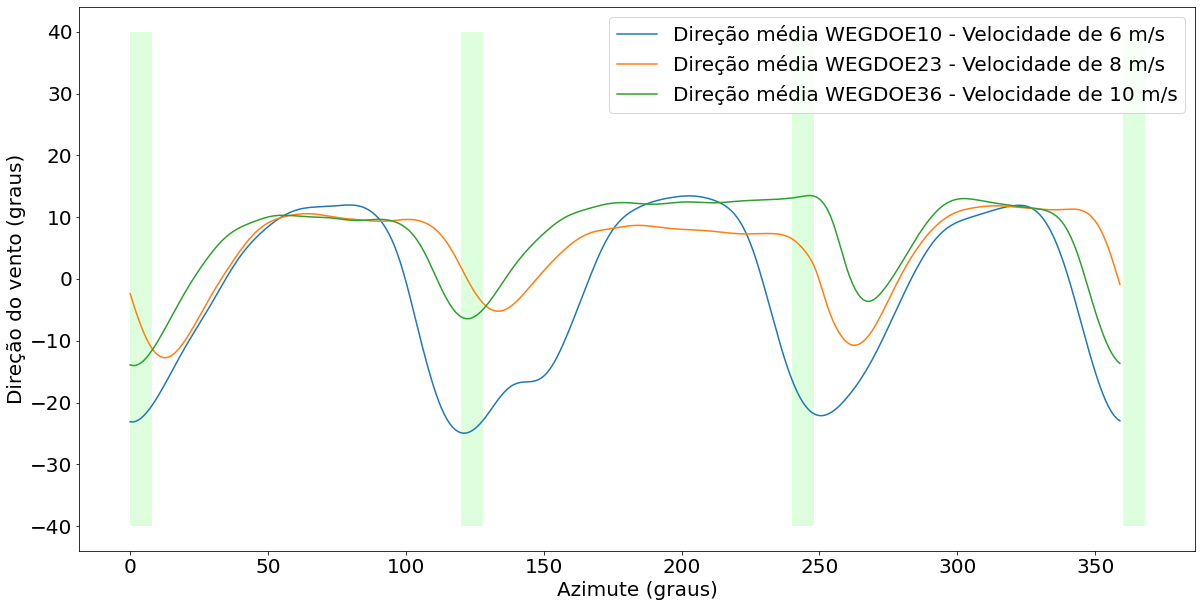

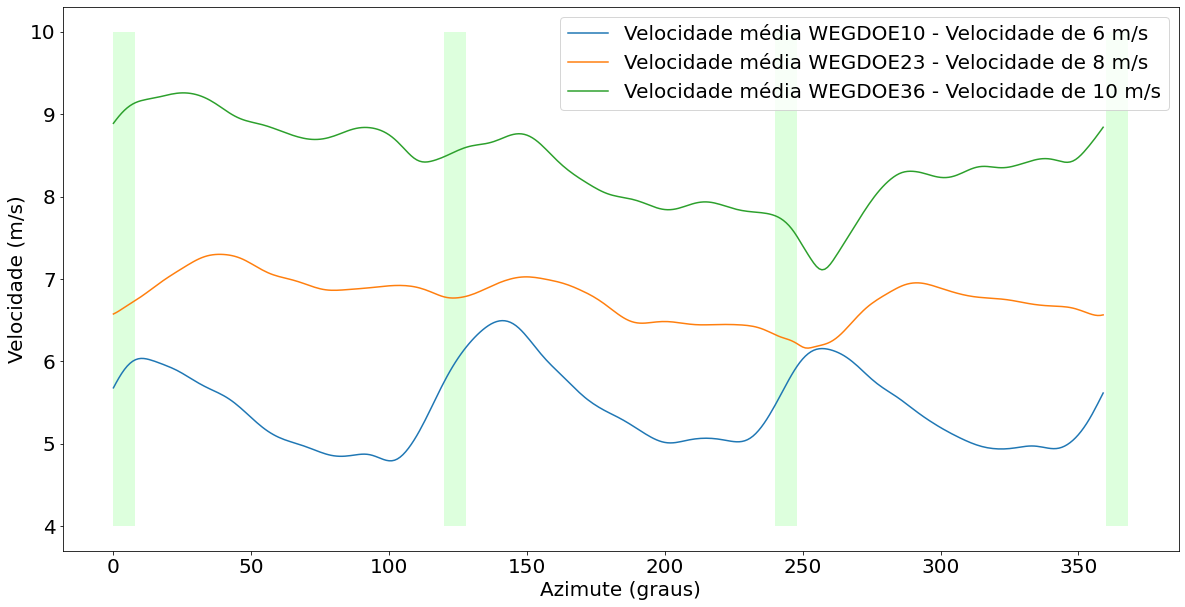

In [92]:
df_media_direction_10["Direção média WEGDOE10 - Velocidade de 6 m/s"]=df_media_direction_10["Direção média WEGDOE10 - Velocidade de 6 m/s"].astype(float)
df_media_direction_23["Direção média WEGDOE23 - Velocidade de 8 m/s"]=df_media_direction_23["Direção média WEGDOE23 - Velocidade de 8 m/s"].astype(float)
df_media_direction_36["Direção média WEGDOE36 - Velocidade de 10 m/s"]=df_media_direction_36["Direção média WEGDOE36 - Velocidade de 10 m/s"].astype(float)


ax = df_media_direction_10.plot(x='Azimute (graus)', y="Direção média WEGDOE10 - Velocidade de 6 m/s", figsize=(20,10), fontsize=20)
ax.set_ylabel("Direção do vento (graus)", fontsize=20)
ax.set_xlabel("Azimute (graus)", fontsize=20)



rect = patches.Rectangle((0, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, -40), 8, 80, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
df_media_direction_23.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE23 - Velocidade de 8 m/s")
df_media_direction_36.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE36 - Velocidade de 10 m/s")
ax.legend(fontsize=20)


df_media_velocity_10["Velocidade média WEGDOE10 - Velocidade de 6 m/s"]=df_media_velocity_10["Velocidade média WEGDOE10 - Velocidade de 6 m/s"].astype(float)
df_media_velocity_23["Velocidade média WEGDOE23 - Velocidade de 8 m/s"]=df_media_velocity_23["Velocidade média WEGDOE23 - Velocidade de 8 m/s"].astype(float)
df_media_velocity_36["Velocidade média WEGDOE36 - Velocidade de 10 m/s"]=df_media_velocity_36["Velocidade média WEGDOE36 - Velocidade de 10 m/s"].astype(float)


ax = df_media_velocity_10.plot(x='Azimute (graus)', y="Velocidade média WEGDOE10 - Velocidade de 6 m/s", figsize=(20,10), fontsize=20)
ax.set_ylabel("Velocidade (m/s)", fontsize=20)
ax.set_xlabel("Azimute (graus)", fontsize=20)
rect = patches.Rectangle((0, 4), 8, 6, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, 4), 8, 6, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((240, 4), 8, 6, linewidth=1, edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
rect = patches.Rectangle((360, 4), 8, 6, linewidth=1,edgecolor='none', facecolor='#dfd')
ax.add_patch(rect)
df_media_velocity_23.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE23 - Velocidade de 8 m/s")
df_media_velocity_36.plot(ax=ax, x='Azimute (graus)', y="Velocidade média WEGDOE36 - Velocidade de 10 m/s")
ax.legend(fontsize=20)



In [ ]:
# import matplotlib.pyplot as plt

# fig = plt.figure()

# for frame in [df_media_direction_36, df_media_direction_37, df_media_direction_39
#              ]:
#     plt.plot(frame['Azimute'], frame['Direção média'], label="sine")

# plt.show()

df_media_direction_36["Direção média WEGDOE36 - Inflow de 0 graus"]=df_media_direction_36["Direção média WEGDOE36 - Inflow de 0 graus"].astype(float)
df_media_direction_33["Direção média WEGDOE33 - Inflow de 8 graus"]=df_media_direction_33["Direção média WEGDOE33 - Inflow de 8 graus"].astype(float)
df_media_direction_31["Direção média WEGDOE31 - Inflow de -8 graus"]=df_media_direction_31["Direção média WEGDOE31 - Inflow de -8 graus"].astype(float)


ax = df_media_direction_36.plot(x='Azimute (graus)', y="Direção média WEGDOE36 - Inflow de 0 graus", figsize=(20,10))
ax.set_ylabel("Direção do vento (graus)")
ax.set_xlabel("Azimute (graus)")

rect = patches.Rectangle((0, -40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
# Add the patch to the Axes
rect = patches.Rectangle((120, -40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((240,-40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((360,-40), 8, 80, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
df_media_direction_33.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE33 - Inflow de 8 graus")
df_media_direction_31.plot(ax=ax, x='Azimute (graus)', y="Direção média WEGDOE31 - Inflow de -8 graus")